# NuSTAR Solar Pointing Planning - June 2022

To use this notebook, move it into the main directory (the one containing `map_projection.py`).

In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import astropy.units as u
import map_projection as mp

from astropy.time import Time
from nustar_pysolar import planning, io


outdir = './2022jun/'
if not os.path.isdir(outdir):
    os.mkdir(outdir)

# June 3, 2022

### Mosaic 1

In [6]:
start = '2022-06-03 13:28:00'
end = '2022-06-03 14:31:00'

# NOTE: I modified the time format in the planning.py source code so that
# the times in the moasic file are more favorable for planning.
planning.make_mosaic(Time([start, end]), outfile=outdir+'mosaic1.txt', write_output=True)

Orbit start: 2022-06-03 13:28:00.000 Orbit end: 2022-06-03 14:31:00.000
('Dwell per position:', 151.19999999999985)

NuSTAR Roll Angle to get roll relative to Sun of 0.00 is 345.52 deg
Step of FOV PA direction is 435.52 deg



### Orbits

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia20220526_163600_0094.fits:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got STEREO-A map.


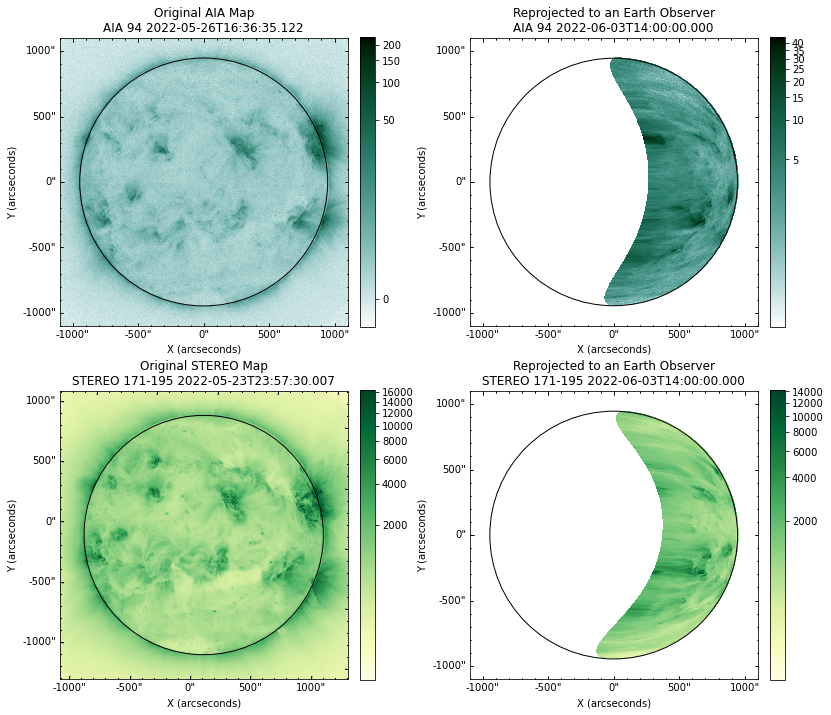

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got STEREO-A map.


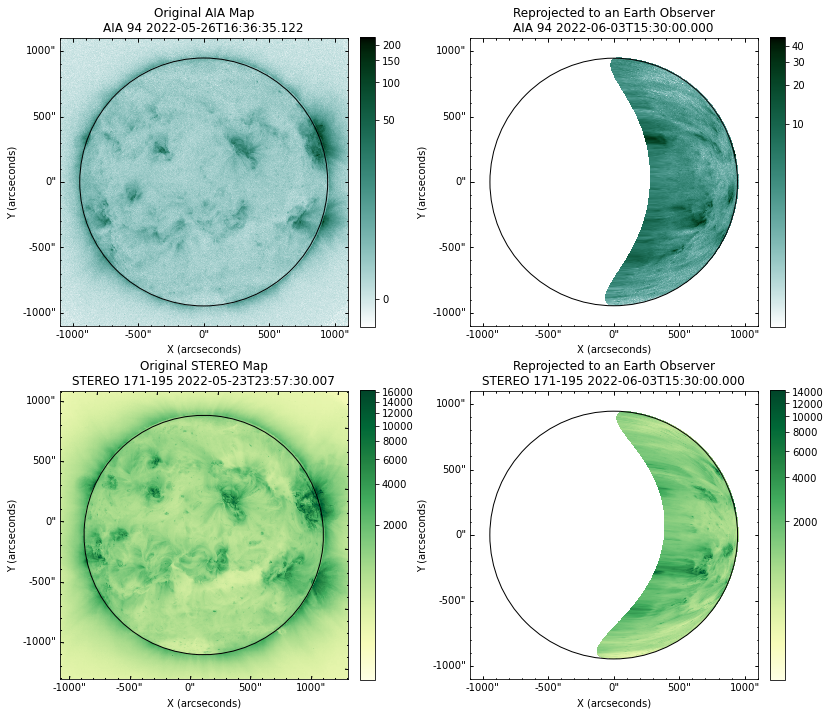

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got STEREO-A map.


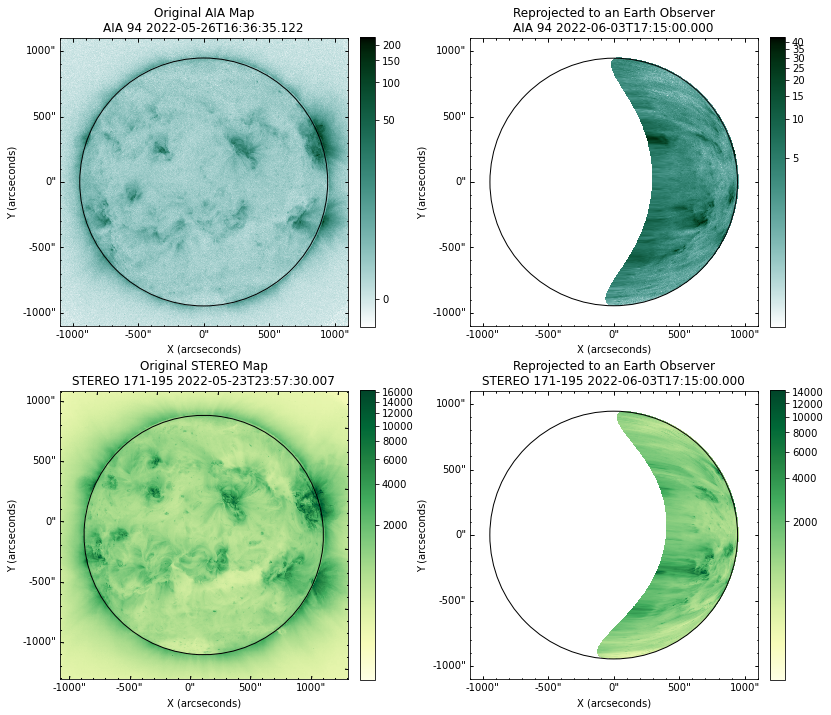

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got STEREO-A map.


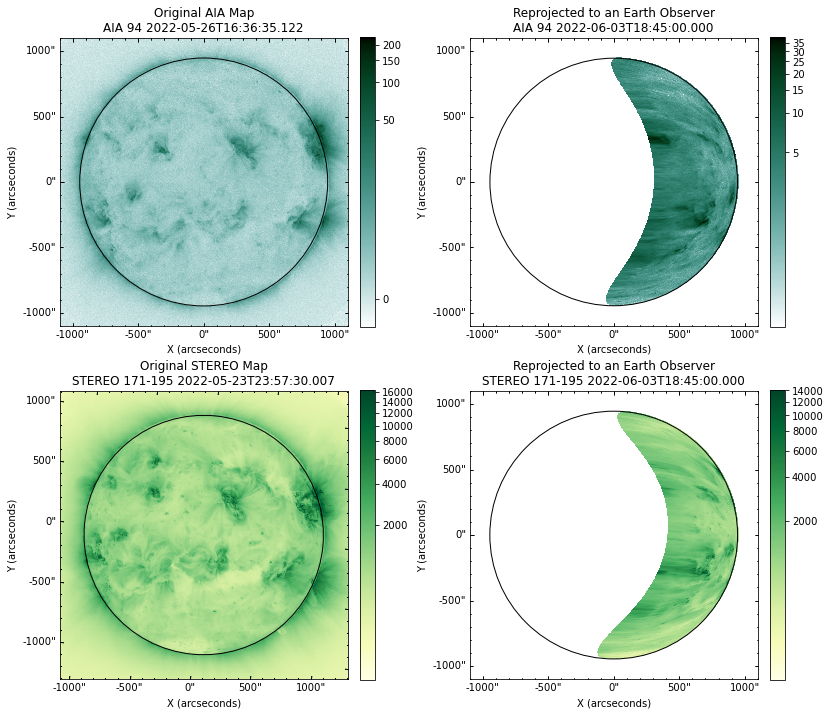

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia20220526_163900_0094.fits:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got STEREO-A map.


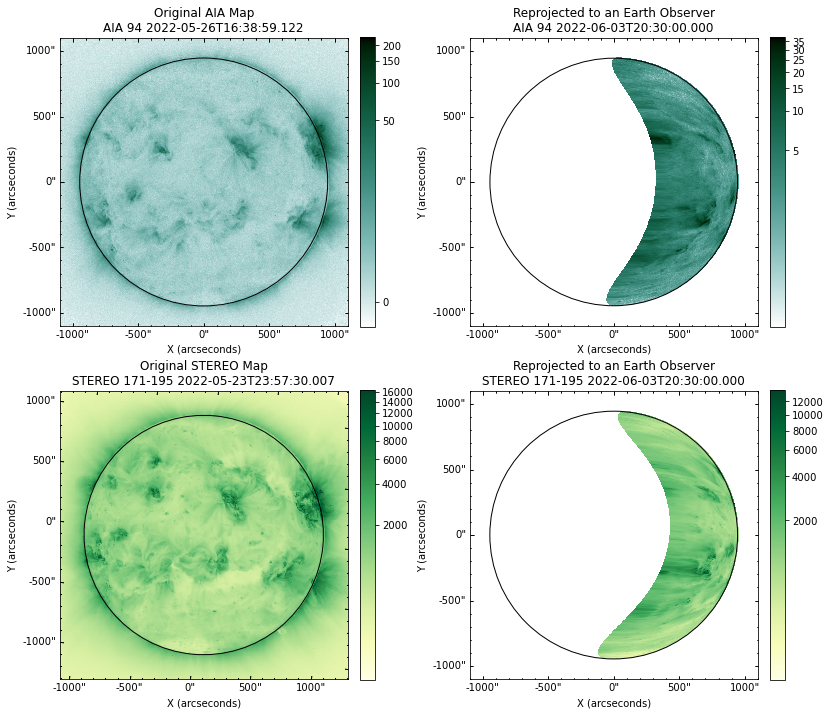

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got STEREO-A map.


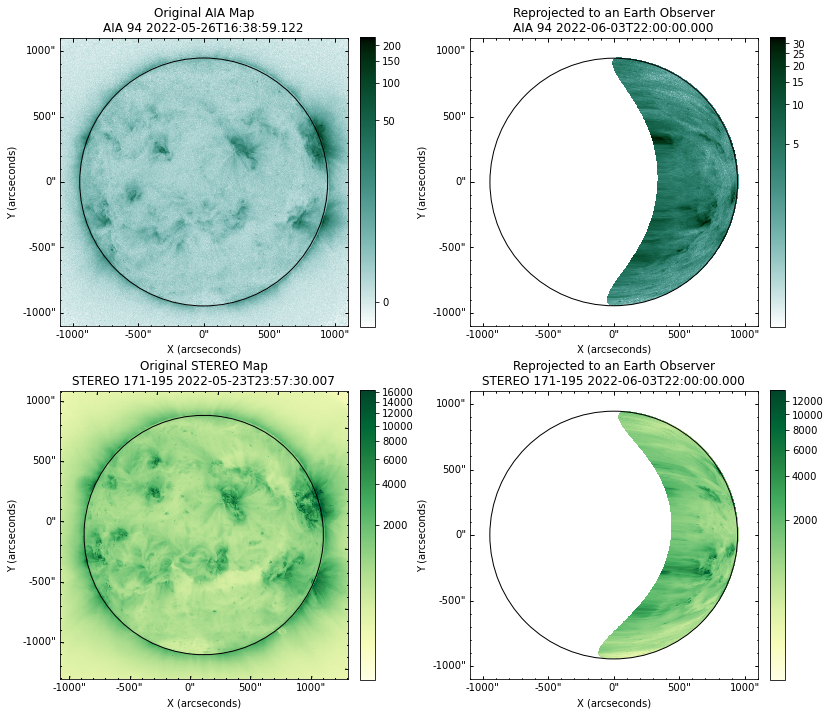

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got STEREO-A map.


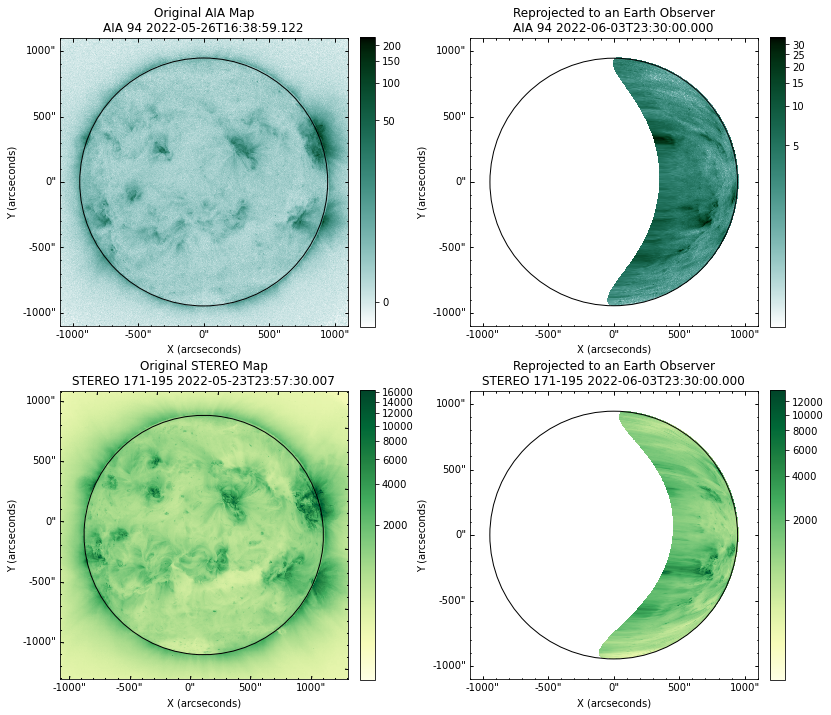

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got STEREO-A map.


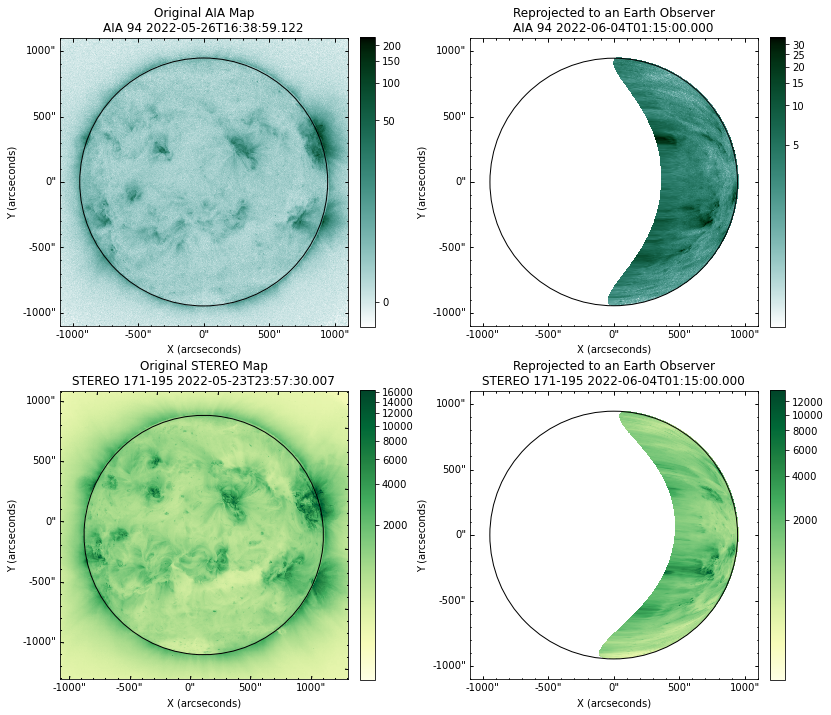

In [3]:
pois = None # [[0,0]] # Default is None

orbit1 = {
    'obstime': '2022-06-03T14:00:00', # Observation midpoint time
    'center': None,                   # NuSTAR center
    'layers': None,                   # NuSTAR FOV
    'angle': 0,                       # Rotation angle
    'psp_loc': None                   # PSP location
}

orbit2 = {
    'obstime': '2022-06-03T15:30:00',
    'center': None,
    'layers': None,
    'angle': 0,
    'psp_loc': None
}

orbit3 = {
    'obstime': '2022-06-03T17:15:00',
    'center': None,
    'layers': None,
    'angle': 0,
    'psp_loc': None
}

orbit4 = {
    'obstime': '2022-06-03T18:45:00',
    'center': None,
    'layers': None,
    'angle': 0,
    'psp_loc': None
}

orbit5 = {
    'obstime': '2022-06-03T20:30:00',
    'center': None,
    'layers': None,
    'angle': 0,
    'psp_loc': None
}

orbit6 = {
    'obstime': '2022-06-03T22:00:00',
    'center': None,
    'layers': None,
    'angle': 0,
    'psp_loc': None
}

orbit7 = {
    'obstime': '2022-06-03T23:30:00',
    'center': None,
    'layers': None,
    'angle': 0,
    'psp_loc': None
}

orbit8 = {
    'obstime': '2022-06-04T01:15:00',
    'center': None,
    'layers': None,
    'angle': 0,
    'psp_loc': None
}

orbits_03 = [orbit1, orbit2, orbit3, orbit4,
             orbit5, orbit6, orbit7, orbit8]

for i, orbit in enumerate(orbits_03, start=1):
    plt.figure(figsize=(13,12))
    axes = mp.reprojection(**orbit, markers=pois)
    plt.savefig(outdir+orbit['obstime'].split('T')[0]+'_orbit'+str(i)+'.jpg', bbox_inches="tight", dpi=200)
    plt.show()

***

# Coordinate Conversion

**Brian Grefenstette's example on NuSTAR solar observation planning is what's needed here (https://github.com/NuSTAR/nustar_pysolar/blob/main/notebooks/Planning_Example.ipynb).**

**I did have to go an manually download the planet ephemeris data file de436.bsp from https://ssd.jpl.nasa.gov/ftp/eph/planets/bsp/ since nustar_pysolar kept timing out with the website. This file is also too large to upload to Github.**

You might want to adjust the tstart from above to look over the whole observing period for NuSTAR insterad of just starting at the time the maps are projected onto.

Now we will find the PA angle (in degrees) and the centre of NuSTAR's field of view (in RA/Dec and degrees) for your solar observation planned above from your helioprojective coordinates.

In [5]:
def combine_dicts(orbits):
    """
    Combine the dictionaries of all the orbits associated
    with a particular observation. This makes it work nicely
    with Brian's coordinate conversion function.

    Parameters
    ----------
    orbits : list
        A list of dictionaries corresponding to a particular
        observation.
    
    Returns
    -------
    combined_dict : dictionary
        A single dictionary from merging all of the input
        dictionaries.
    """

    combined_dict = {}
    
    for key in orbits[0].keys():
        combined_dict[key] = []
        for orbit in orbits:
            combined_dict[key].append(orbit[key])
    
    return combined_dict


def coordinate_conversion(obs_start, obs_end, nu_angles, nu_centers):
    """
    Perform a coordinate conversion using the provided inputs.

    Parameters
    ----------
    obs_start : str
        The start time of the full observation period.
    obs_end : str
        The end time of the full observation period.
    nu_angles : list
        List of the roll angles for each orbit in the observation.
    nu_centers : list
        List of the FOV center point for each orbit in the observation.

    Returns
    -------
    None
    """
    
    print("For a \"square\" field of view, use angle=0 / 90 / 180 / 270 to have DET0 at the NE (top left) / SE / SW / NW\ncorners of a square field of view.")
    
    for start, end, angles, centers in zip([obs_start], [obs_end], [nu_angles], [nu_centers]):
        
        # Get occultation period times
        fname = io.download_occultation_times(outdir='./data/')

        # Define observing window
        orbits = planning.sunlight_periods(fname, tstart=start, tend=end)

        # Loop over orbits and find pointing in RA/Dec
        print("\nStarting @ ", start)
        for i, orbit in enumerate(orbits):
            
            # Calculate the PA angle
            pa = planning.get_nustar_roll(orbit[0], angles[i]<<u.deg) # angle is anti-clockwise starting with Det0 in top-left

            offset = centers[i]*u.arcsec
            midTime = (0.5*(orbit[1] - orbit[0]) + orbit[0])
            sky_pos = planning.get_skyfield_position(midTime, offset, load_path='./data', parallax_correction=True)
            print("\nOrbit: {}".format(i))
            print("Orbit start: {} -> Orbit end: {}".format(orbit[0], orbit[1]))
            print('Aim time: {} RA: {}, Dec: {}'.format(midTime, sky_pos[0], sky_pos[1]))
            print("NuSTAR Roll angle for anti-clockwise rotation of {} deg from SN @ {}: {}\n".format(angles[i], orbit[0], pa))
        print("\n\n")


# The 'observations' list is the only thing that needs to be changed
# for the coordinate conversion between different observation plannings.
observations = [orbits_04]

for observation in observations:

    # Combine the orbit dictionaries for all orbits in the observation period.
    combined_dict = combine_dicts(observation)
    
    # Find the start of the *observation* period (corresponds to the start of the first orbit).
    t_first_orbit = datetime.datetime.strptime(observation[0]['time'], '%Y-%m-%dT%H:%M:%S')
    obs_start = (t_first_orbit-datetime.timedelta(minutes=40)).strftime("%Y-%m-%dT%H:%M:%S")

    # Find the end of the *observation* period (corresponds to the end of the last orbit).
    t_last_orbit = datetime.datetime.strptime(observation[-1]['time'], '%Y-%m-%dT%H:%M:%S')
    obs_end = (t_last_orbit+datetime.timedelta(minutes=70)).strftime("%Y-%m-%dT%H:%M:%S")

    # Perform the coordinate conversion for each orbit in the observation period.
    coordinate_conversion(obs_start, obs_end, combined_dict['angle'], combined_dict['center'])

For a "square" field of view, use angle=0 / 90 / 180 / 270 to have DET0 at the NE (top left) / SE / SW / NW
corners of a square field of view.

Starting @  2022-02-24T14:50:00


[#################################] 100% de436.bsp



Orbit: 0
Orbit start: 2022-02-24T14:57:10.000 -> Orbit end: 2022-02-24T15:58:20.000
Aim time: 2022-02-24T15:27:45.000 RA: 337.6317089515314 deg, Dec: -9.28286843661774 deg
NuSTAR Roll angle for anti-clockwise rotation of 0 deg from SN @ 2022-02-24T14:57:10.000: 339.67377003819195 deg


Orbit: 1
Orbit start: 2022-02-24T16:33:40.000 -> Orbit end: 2022-02-24T17:35:00.000
Aim time: 2022-02-24T17:04:20.000 RA: 337.6952791308157 deg, Dec: -9.258019467916865 deg
NuSTAR Roll angle for anti-clockwise rotation of 0 deg from SN @ 2022-02-24T16:33:40.000: 339.6550829293436 deg


Orbit: 2
Orbit start: 2022-02-24T18:10:20.000 -> Orbit end: 2022-02-24T19:11:30.000
Aim time: 2022-02-24T18:40:55.000 RA: 337.7588386854213 deg, Dec: -9.233159833534145 deg
NuSTAR Roll angle for anti-clockwise rotation of 0 deg from SN @ 2022-02-24T18:10:20.000: 339.6363978408703 deg


Orbit: 3
Orbit start: 2022-02-24T19:47:00.000 -> Orbit end: 2022-02-24T20:48:10.000
Aim time: 2022-02-24T20:17:35.000 RA: 337.822427635130